<a href="https://colab.research.google.com/github/Surajkr1166/Infosys-SpringBoard-Internship/blob/Task-1/AI_PREDICTIVE_MODEL_FOR_CREDIT_UNDESRWRITING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score, roc_curve, auc, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#upload the dataset local device
from google.colab import files
uploaded = files.upload()

Saving credit_underwriting_data.csv to credit_underwriting_data.csv


In [ ]:
#load the dataset
data = pd.read_csv('credit_underwriting_data.csv')

In [ ]:
data.head()

,Applicant_ID,Applicant_Age,Gender,Marital_Status,Income(USD),Credit Score,Loan_Amount(USD),Loan_Purpose,Residence_State,Loan_Term(years),Debt_to_Income(%),Employment_status,Loan_Status(Target)
0,1,76.0,Female,single,74959.0,352.0,14860.0,Home,Punjab,26.0,11.0,Unemployed,Denied
1,2,37.0,Female,single,107052.0,640.0,194099.0,Personal,West_Bengal,9.0,42.0,Retired,Denied
2,3,66.0,Male,single,98308.0,504.0,226580.0,Education,Madhya_Pradesh,4.0,40.0,Unemployed,Denied
3,4,43.0,Male,single,71983.0,710.0,268156.0,Medical,Andhra_Pradesh,5.0,11.0,Retired,Denied
4,5,44.0,Male,single,142454.0,825.0,248710.0,Home,West_Bengal,13.0,6.0,Unemployed,Denied


In [ ]:
data.shape

(101417, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101417 entries, 0 to 101416
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Applicant_ID         101417 non-null  int64  
 1   Applicant_Age        100000 non-null  float64
 2   Gender               100000 non-null  object 
 3   Marital_Status       100000 non-null  object 
 4   Income(USD)          100000 non-null  float64
 5   Credit Score         99999 non-null   float64
 6   Loan_Amount(USD)     100000 non-null  float64
 7   Loan_Purpose         100000 non-null  object 
 8   Residence_State      100000 non-null  object 
 9   Loan_Term(years)     100000 non-null  float64
 10  Debt_to_Income(%)    100000 non-null  float64
 11  Employment_status    101417 non-null  object 
 12  Loan_Status(Target)  101417 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 10.1+ MB


In [ ]:
data.describe()

,Applicant_ID,Applicant_Age,Income(USD),Credit Score,Loan_Amount(USD),Loan_Term(years),Debt_to_Income(%)
count,101417.000000,100000.000000,100000.00000,99999.000000,100000.000000,100000.000000,100000.000000
mean,50709.000000,49.995400,89816.97730,575.286213,249589.479030,15.484630,24.989140
std,29276.710462,17.056051,34583.89829,159.233600,143797.014856,8.663918,14.700457
min,1.000000,21.000000,30001.00000,300.000000,1000.000000,1.000000,0.000000
25%,25355.000000,35.000000,59953.75000,437.000000,125677.500000,8.000000,12.000000
50%,50709.000000,50.000000,89744.00000,576.000000,249439.500000,15.000000,25.000000
75%,76063.000000,65.000000,119742.25000,713.000000,374193.750000,23.000000,38.000000
max,101417.000000,79.000000,150000.00000,850.000000,499998.000000,30.000000,50.000000


In [ ]:
print("\nNumber of Missing Values in Each Column:")
print(data.isnull().sum())


Number of Missing Values in Each Column:
Applicant_ID              0
Applicant_Age          1417
Gender                 1417
Marital_Status         1417
Income(USD)            1417
Credit Score           1418
Loan_Amount(USD)       1417
Loan_Purpose           1417
Residence_State        1417
Loan_Term(years)       1417
Debt_to_Income(%)      1417
Employment_status         0
Loan_Status(Target)       0
dtype: int64


In [ ]:
data.Applicant_ID.value_counts(dropna=False)

,count
Applicant_ID,
1,1
67620,1
67618,1
67617,1
67616,1
...,...
33805,1
33804,1
33803,1


In [ ]:
data.Gender.value_counts(dropna=False)

,count
Gender,
Female,50340
Male,49660
NaN,1417


In [ ]:
data.Marital_Status.value_counts(dropna=False)

,count
Marital_Status,
single,89763
married,10237
NaN,1417


In [ ]:
data['Income(USD)'].value_counts(dropna=False)

,count
Income(USD),
NaN,1417
99104.0,8
90948.0,6
85244.0,6
90540.0,6
...,...
96777.0,1
96948.0,1
81916.0,1


In [ ]:
data['Credit Score'].value_counts(dropna=False)


,count
Credit Score,
NaN,1418
850.0,223
552.0,220
386.0,217
387.0,217
...,...
311.0,151
548.0,148
574.0,147


In [ ]:
data['Loan_Amount(USD)'].value_counts(dropna=False)



,count
Loan_Amount(USD),
NaN,1417
27430.0,4
477597.0,4
296381.0,4
104577.0,4
...,...
270628.0,1
460433.0,1
195566.0,1


In [ ]:
data['Loan_Purpose'].value_counts(dropna=False)

,count
Loan_Purpose,
Education,20145
Medical,20015
Personal,19995
Home,19971
Auto,19874
NaN,1417


In [ ]:
data['Residence_State'].value_counts(dropna=False)

,count
Residence_State,
Uttar_Pradesh,11255
Maharashtra,10158
Andhra_Pradesh,10045
West_Bengal,9327
Bihar,7867
Tamil_Nadu,6595
Madhya_Pradesh,5587
Karnataka,4687
Gujarat,4582


In [ ]:
data['Loan_Term(years)'].value_counts(dropna=False)

,count
Loan_Term(years),
7.0,3428
9.0,3404
16.0,3400
4.0,3384
12.0,3383
30.0,3379
21.0,3370
8.0,3369
2.0,3369


In [ ]:
data['Debt_to_Income(%)'].value_counts(dropna=False)

,count
Debt_to_Income(%),
6.0,2056
23.0,2039
42.0,2021
37.0,2020
40.0,2019
31.0,2016
21.0,2011
29.0,2009
30.0,1999


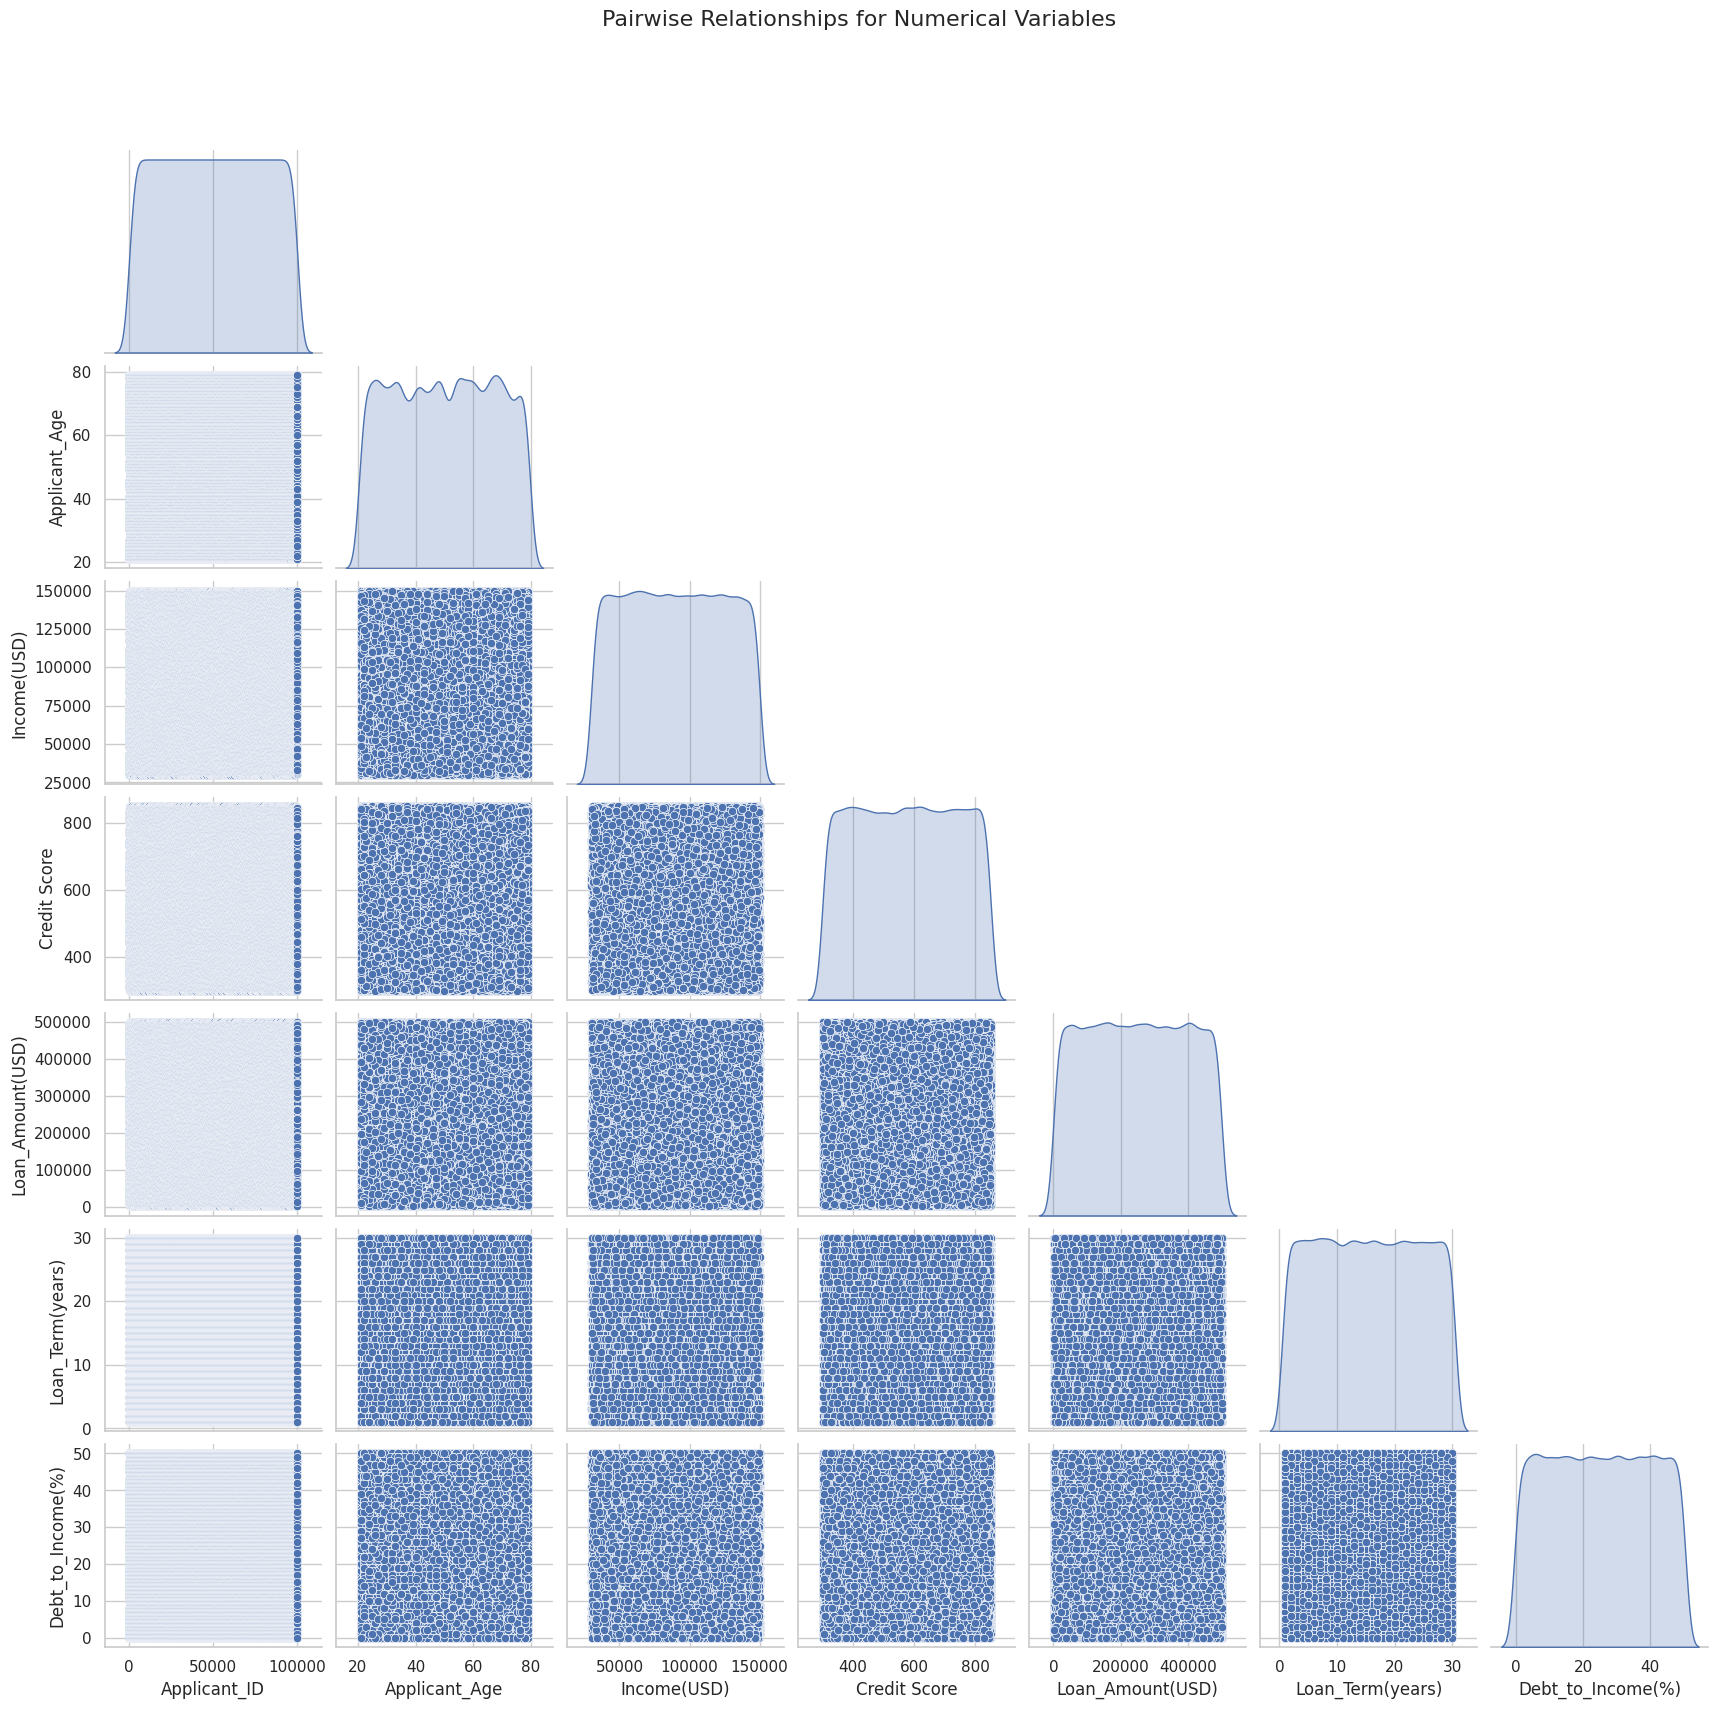

In [ ]:
# Select only numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Drop missing values to avoid errors in pairplot
data_cleaned = data[numerical_columns].dropna()

# Set a theme for better aesthetics
sns.set_theme(style="whitegrid")

# Create a Pairplot for numerical variables
g = sns.pairplot(data_cleaned, diag_kind='kde', corner=True, height=2.5)

# Add a title to the plot with proper positioning
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Pairwise Relationships for Numerical Variables', fontsize=16)

# Show the plot
plt.show()

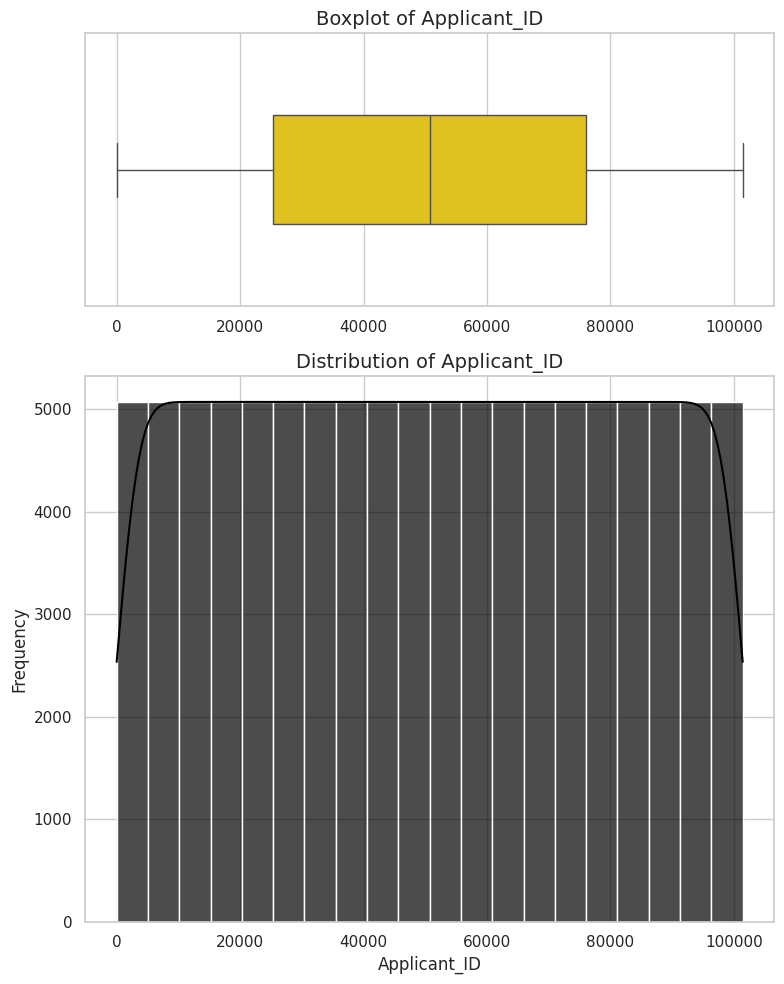

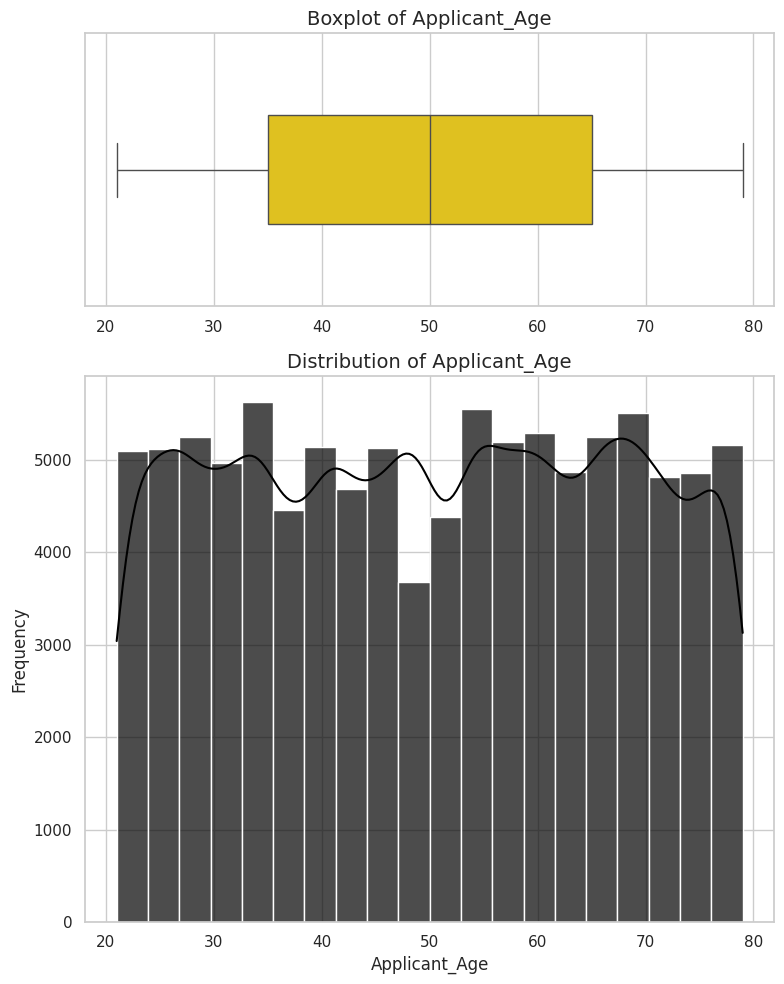

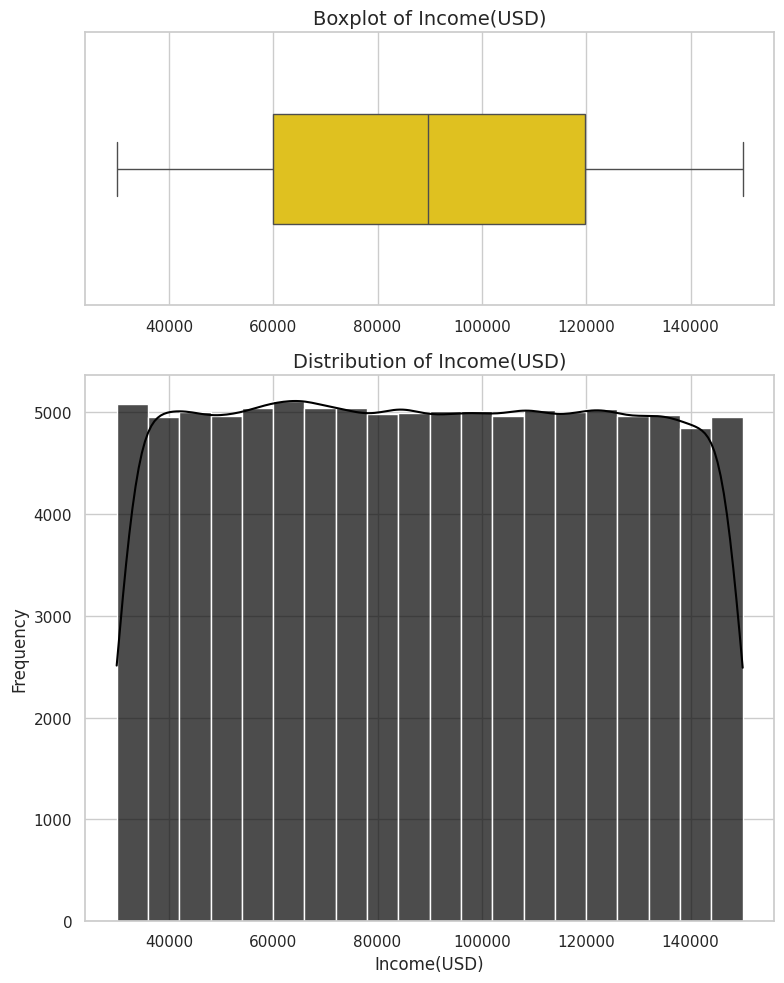

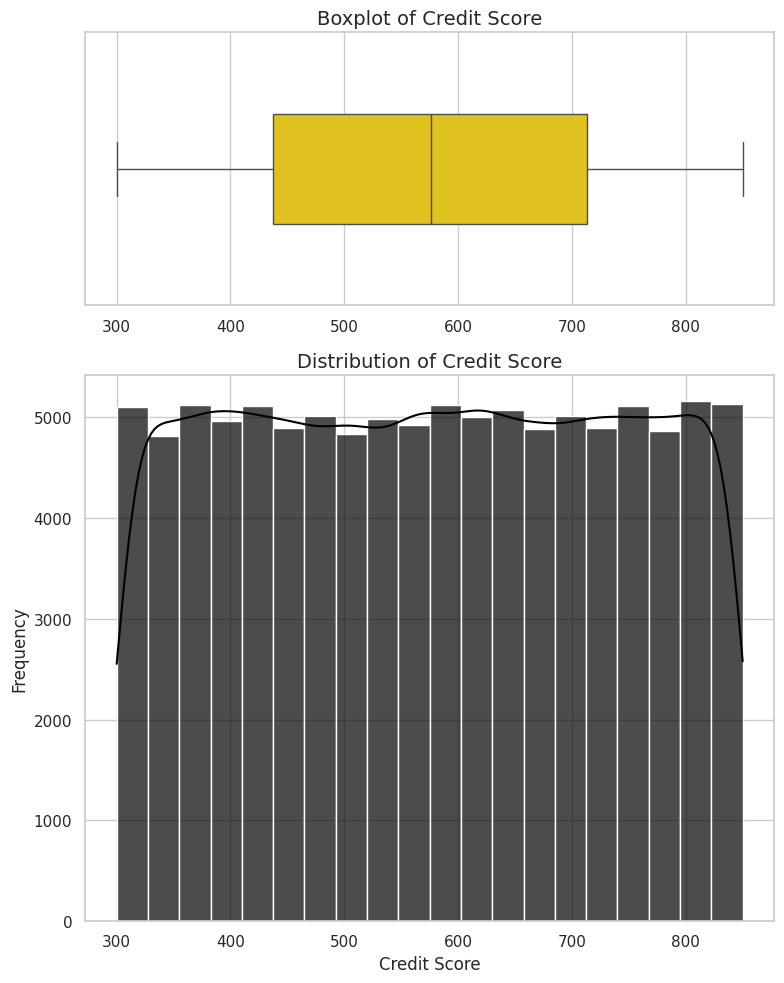

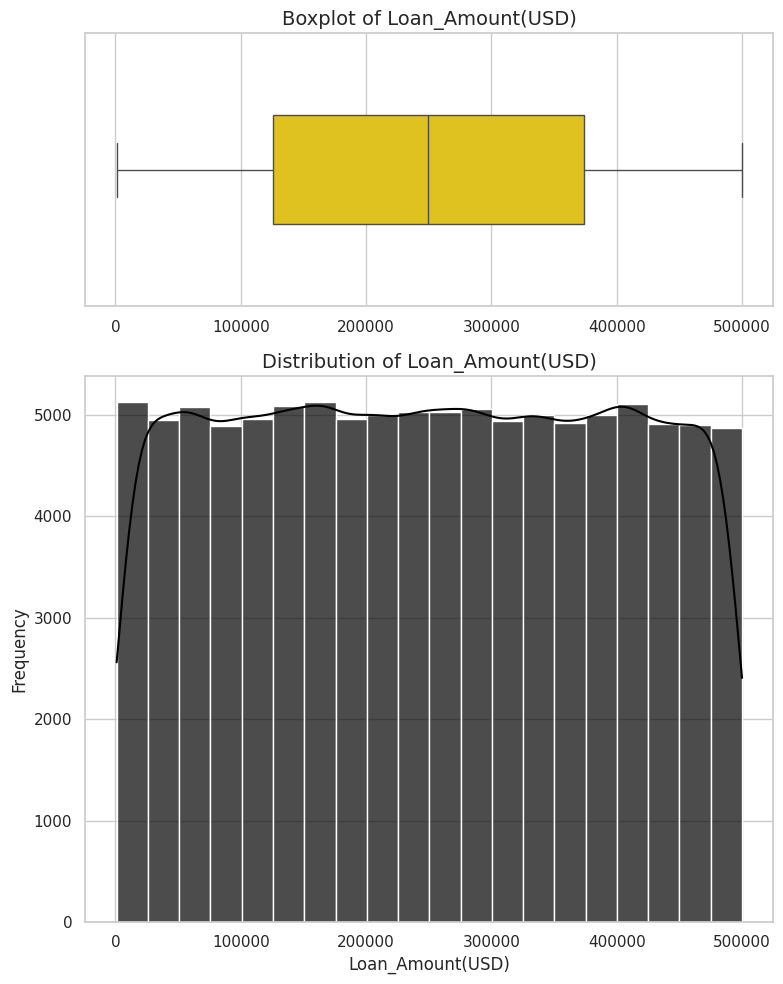

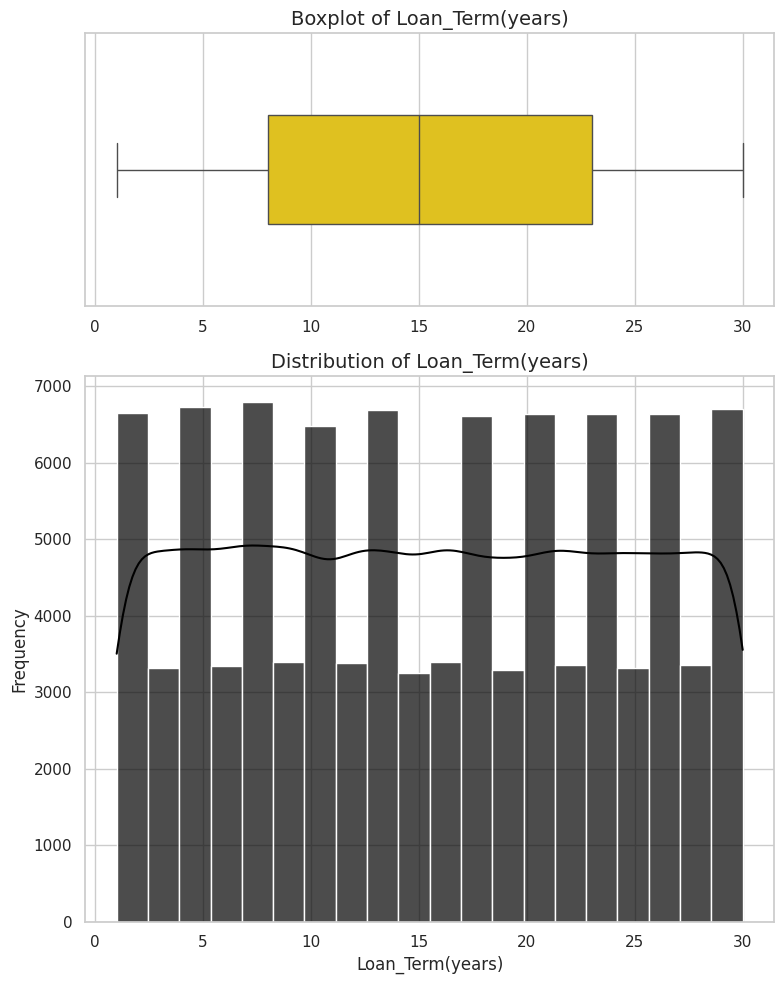

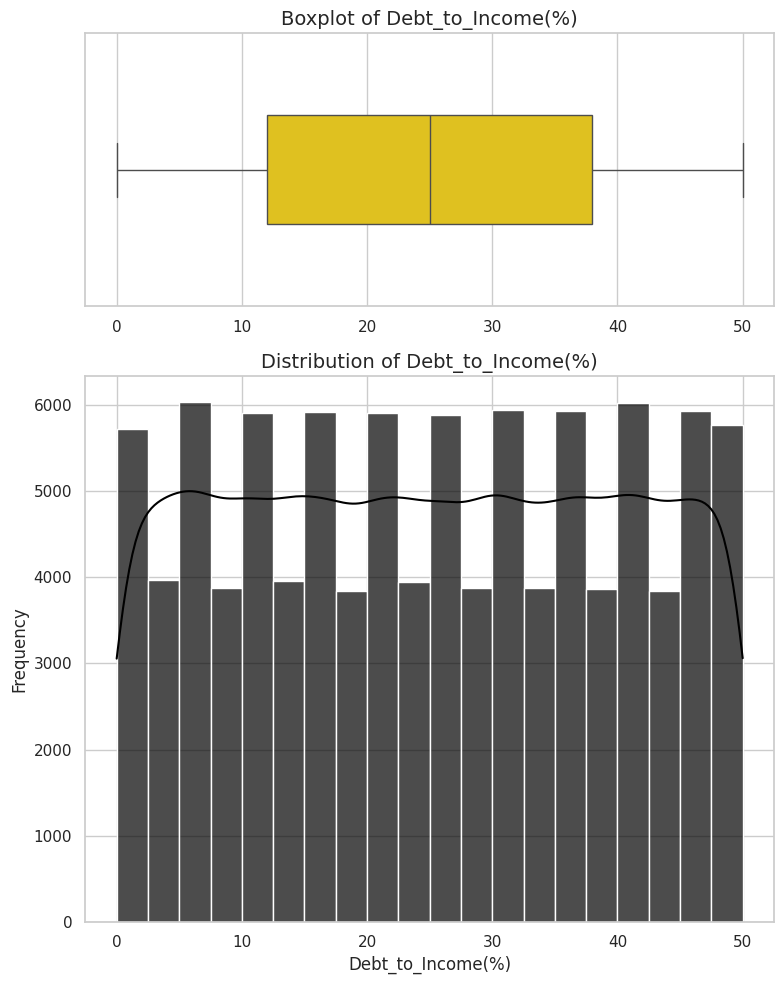

In [ ]:
#Set Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

# Extract numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Iterate through each numerical column for visualization
for column in numerical_columns:
    fig, ax = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [2, 4]})

    # Drop NaN values for cleaner visualization
    column_data = data[column].dropna()

    # Boxplot
    sns.boxplot(x=column_data, ax=ax[0], color='gold', width=0.4)
    ax[0].set_title(f'Boxplot of {column}', fontsize=14)
    ax[0].set_xlabel('')  # Removes redundant x-label for the boxplot

    # Histogram and KDE
    sns.histplot(column_data, kde=True, ax=ax[1], color='black', bins=20, alpha=0.7)
    ax[1].set_title(f'Distribution of {column}', fontsize=14)
    ax[1].set_xlabel(column, fontsize=12)
    ax[1].set_ylabel('Frequency', fontsize=12)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()


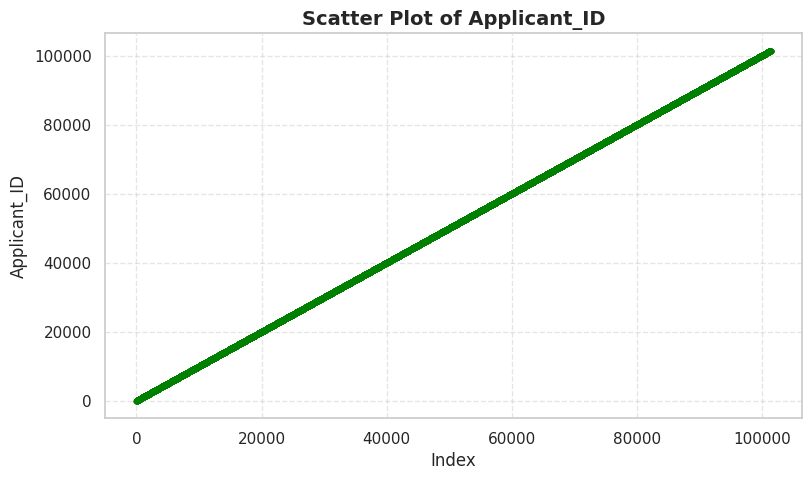

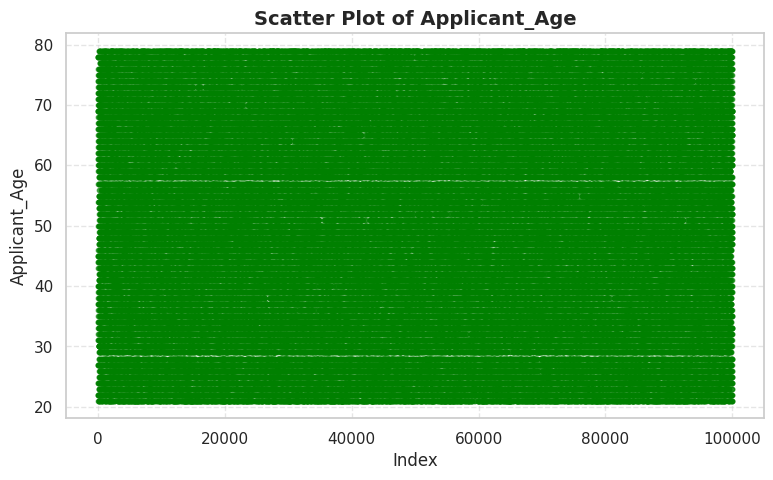

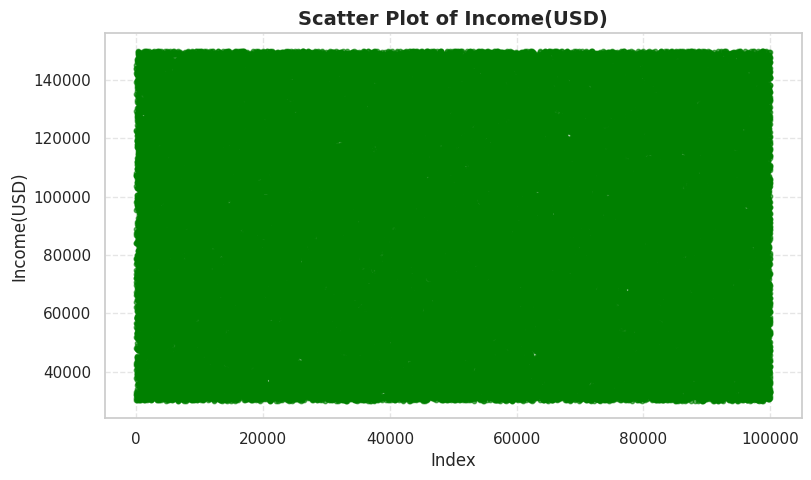

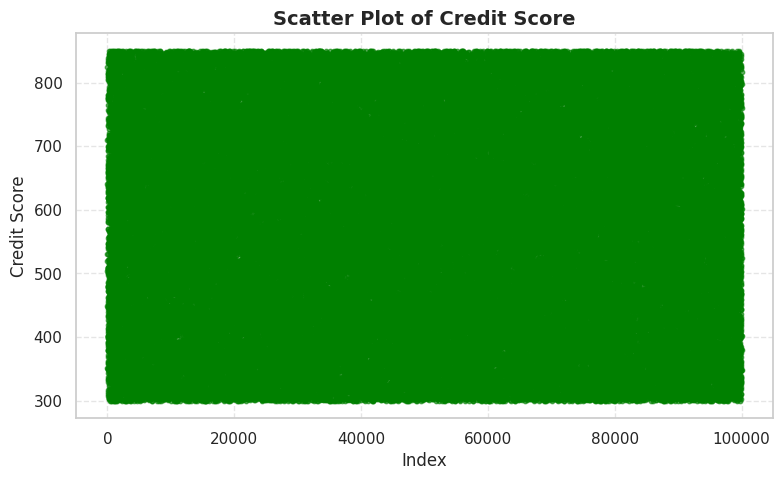

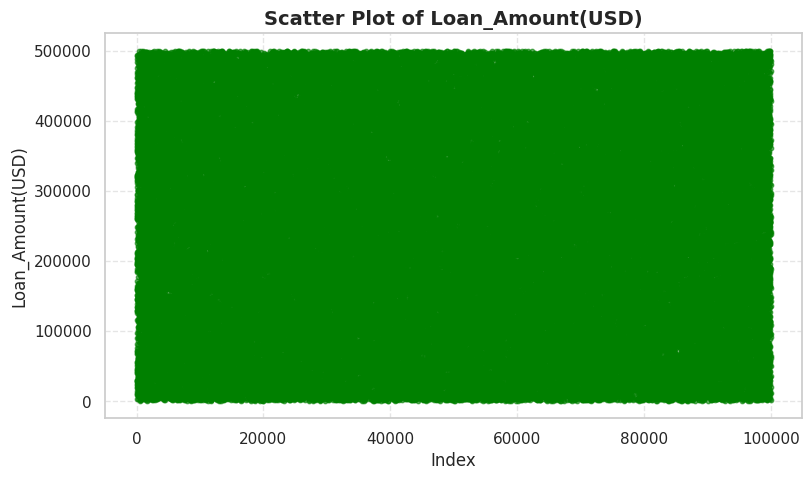

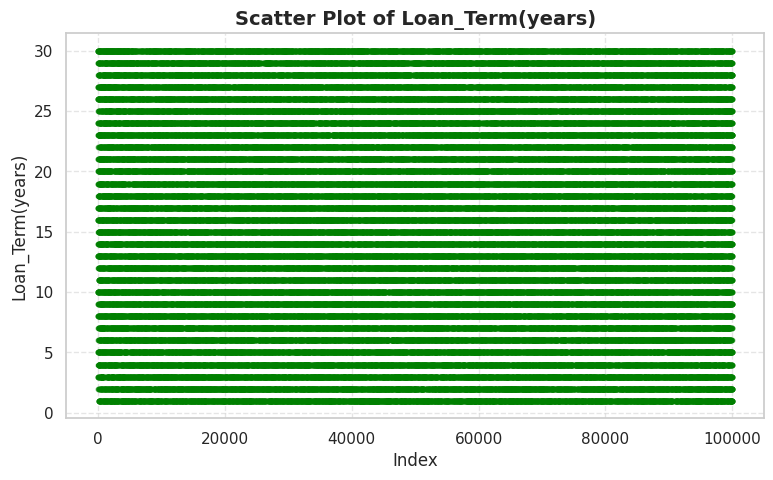

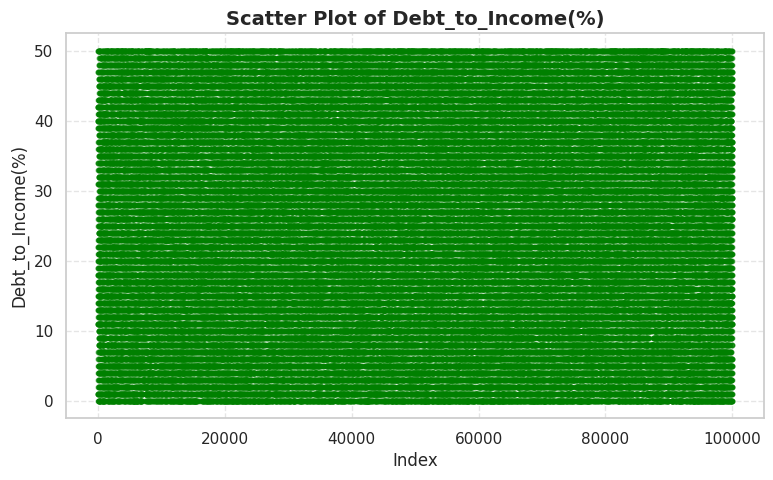

In [ ]:
import matplotlib.pyplot as plt

# Iterate through numerical columns for scatter plot visualization
for column in numerical_columns:
    column_data = data[column].dropna()  # Handle missing values

    plt.figure(figsize=(9, 5))  # Slightly wider figure for better clarity
    plt.scatter(x=column_data.index, y=column_data, alpha=0.6, color='green', s=10)  # Adjust marker size
    plt.title(f'Scatter Plot of {column}', fontsize=14, fontweight='bold')
    plt.xlabel('Index', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.grid(linestyle='--', alpha=0.5)  # Improve grid style
    plt.show()


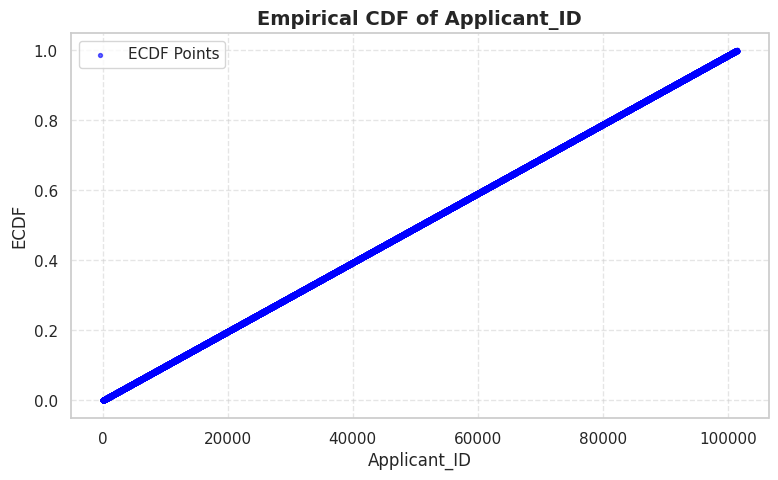

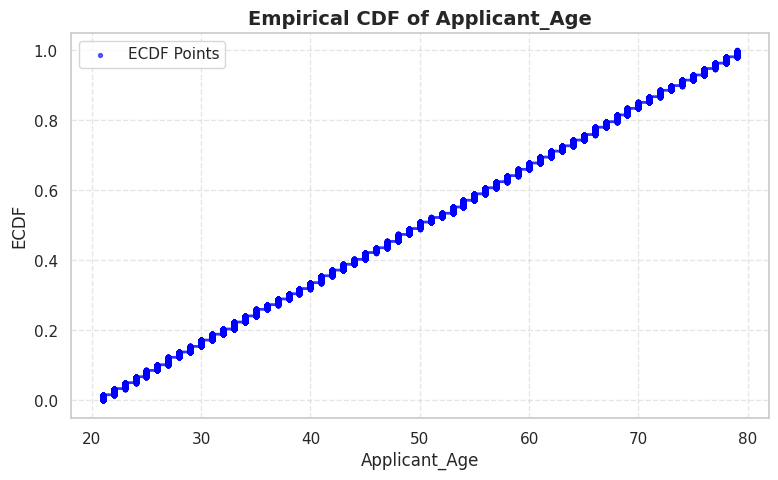

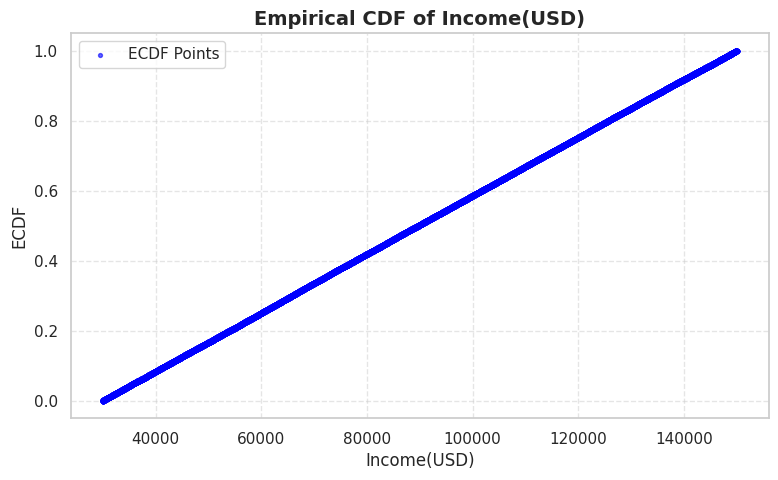

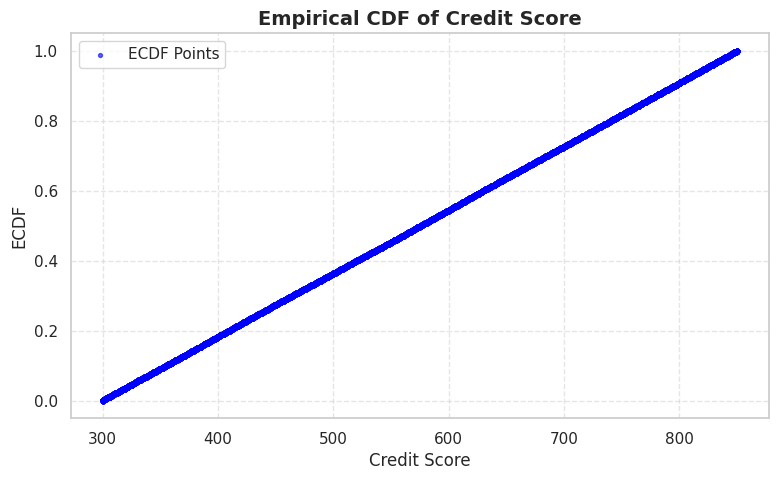

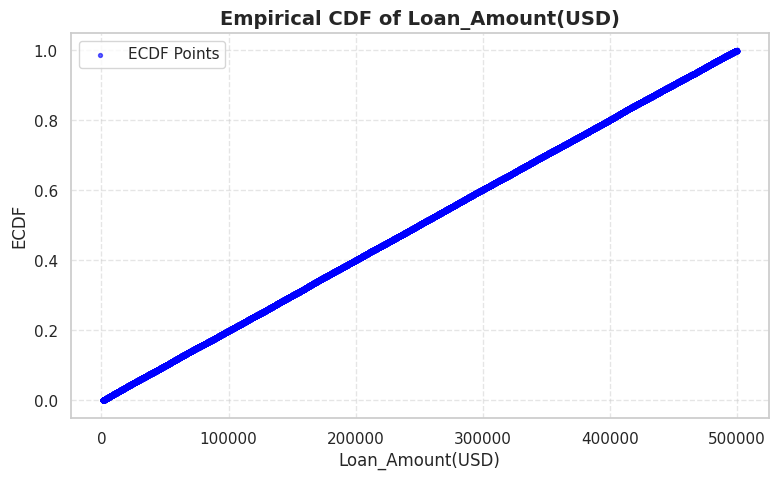

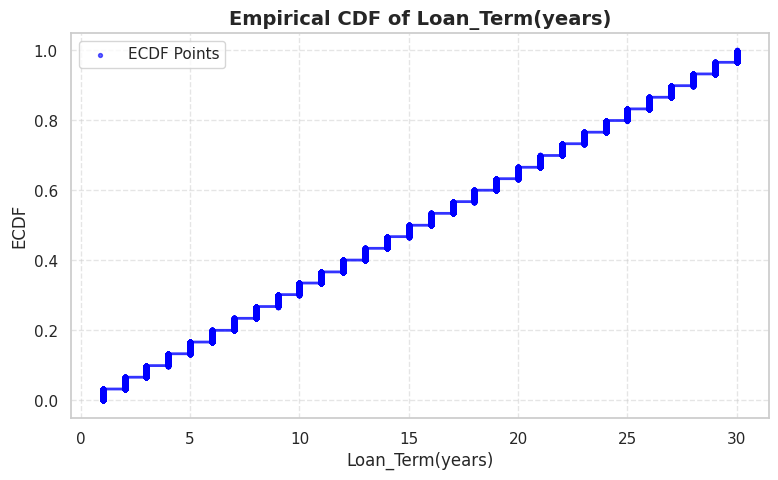

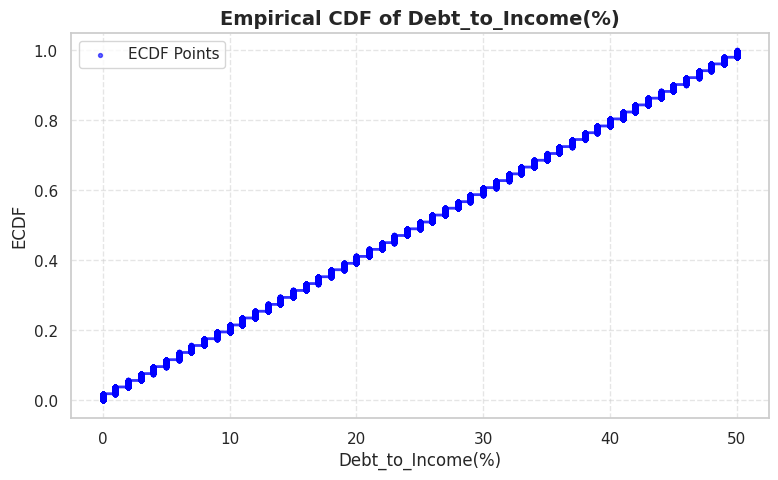

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Iterate through numerical columns for ECDF plotting
for column in numerical_columns:
    column_data = data[column].dropna()  # Handle missing values

    # Compute ECDF
    sorted_data = np.sort(column_data)
    y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Plot ECDF
    plt.figure(figsize=(9, 5))  # Slightly wider figure for better visualization
    plt.step(sorted_data, y, where='post', color='blue', linewidth=2, alpha=0.8)
    plt.scatter(sorted_data, y, color='blue', s=8, alpha=0.6, label="ECDF Points")  # Add scatter points for visibility
    plt.title(f'Empirical CDF of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('ECDF', fontsize=12)
    plt.grid(linestyle='--', alpha=0.5)  # Improve grid style
    plt.legend()
    plt.show()


In [ ]:
# Step 3: Iteratively Explore Each Feature
for idx, column in enumerate(data.columns, start=1):
    unique_values = data[column].unique()[:10]  # Limit unique values display for clarity

    print(f"\n🔹 Feature {idx}: {column}")
    print("=" * (15 + len(column)))
    print(f"📌 Data Type          : {data[column].dtype}")
    print(f"📌 Missing Values     : {data[column].isna().sum()} ({data[column].isna().mean():.2%})")
    print(f"📌 Number of Uniques  : {data[column].nunique()}")
    print(f"📌 Sample Unique Values: {unique_values if len(unique_values) > 0 else 'No unique values'}")
    print("-" * (15 + len(column)))



🔹 Feature 1: Applicant_ID
📌 Data Type          : int64
📌 Missing Values     : 0 (0.00%)
📌 Number of Uniques  : 101417
📌 Sample Unique Values: [ 1  2  3  4  5  6  7  8  9 10]
---------------------------

🔹 Feature 2: Applicant_Age
📌 Data Type          : float64
📌 Missing Values     : 1417 (1.40%)
📌 Number of Uniques  : 59
📌 Sample Unique Values: [76. 37. 66. 43. 44. 45. 63. 31. 71. 46.]
----------------------------

🔹 Feature 3: Gender
📌 Data Type          : object
📌 Missing Values     : 1417 (1.40%)
📌 Number of Uniques  : 2
📌 Sample Unique Values: ['Female' 'Male' nan]
---------------------

🔹 Feature 4: Marital_Status
📌 Data Type          : object
📌 Missing Values     : 1417 (1.40%)
📌 Number of Uniques  : 2
📌 Sample Unique Values: ['single' 'married' nan]
-----------------------------

🔹 Feature 5: Income(USD)
📌 Data Type          : float64
📌 Missing Values     : 1417 (1.40%)
📌 Number of Uniques  : 67703
📌 Sample Unique Values: [ 74959. 107052.  98308.  71983. 142454.  95320.  32325.

In [ ]:
# Check if column exists before calculating missing values:
if column in data.columns:
        print(f"Missing Columns: {data[column].isnull().sum()}")
        print(f"Percentage of Columns: {data[column].isnull().mean() * 100:.2f}%")
else:
        print(f"Column '{column}' not found in DataFrame.")

Missing Columns: 0
Percentage of Columns: 0.00%


In [ ]:
# Step 4: Correlation Analysis (For Numerical Features only)
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Features:", list(numerical_features))


Numerical Features: ['Applicant_ID', 'Applicant_Age', 'Income(USD)', 'Credit Score', 'Loan_Amount(USD)', 'Loan_Term(years)', 'Debt_to_Income(%)']


In [ ]:
# Compute correlation matrix
correlation_matrix = data[numerical_features].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                   Applicant_ID  Applicant_Age  Income(USD)  Credit Score  \
Applicant_ID           1.000000       0.003245    -0.001078     -0.005102   
Applicant_Age          0.003245       1.000000    -0.000504     -0.000018   
Income(USD)           -0.001078      -0.000504     1.000000     -0.002922   
Credit Score          -0.005102      -0.000018    -0.002922      1.000000   
Loan_Amount(USD)       0.006255       0.000680     0.004520      0.001457   
Loan_Term(years)      -0.001571       0.002995     0.000378      0.000506   
Debt_to_Income(%)      0.004770       0.001832     0.001459     -0.008515   

                   Loan_Amount(USD)  Loan_Term(years)  Debt_to_Income(%)  
Applicant_ID               0.006255         -0.001571           0.004770  
Applicant_Age              0.000680          0.002995           0.001832  
Income(USD)                0.004520          0.000378           0.001459  
Credit Score               0.001457          0.000506         

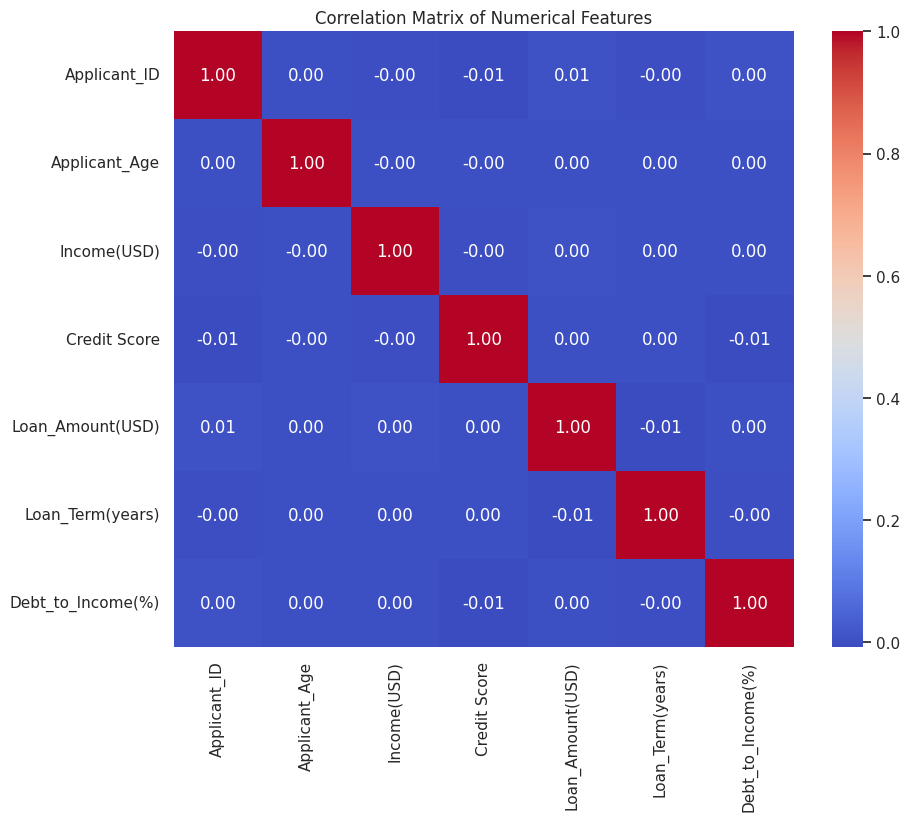

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

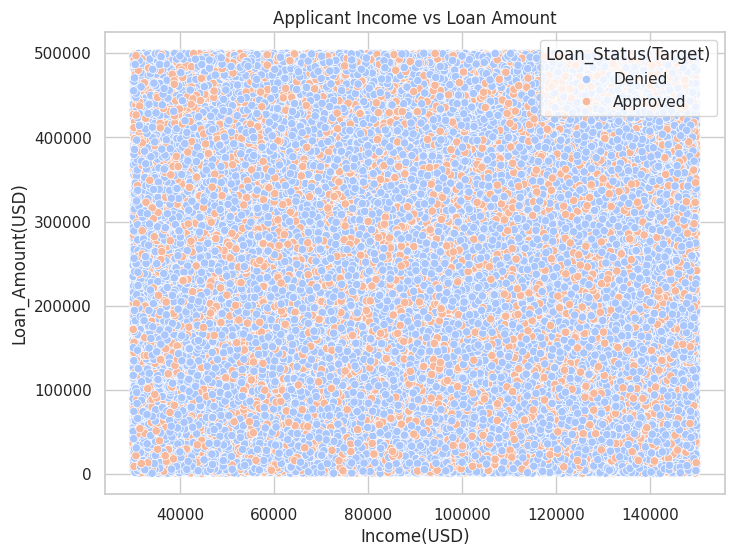

In [ ]:
if 'Income(USD)' in data.columns and 'Loan_Amount(USD)' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Income(USD)', y='Loan_Amount(USD)', hue='Loan_Status(Target)', data=data, palette='coolwarm')
    plt.title('Applicant Income vs Loan Amount')
    plt.xlabel('Income(USD)')
    plt.ylabel('Loan_Amount(USD)')
    plt.show()

In [ ]:
data = data.drop(['Applicant_ID'], axis = 1)

In [ ]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['Applicant_Age', 'Income(USD)', 'Credit Score', 'Loan_Amount(USD)', 'Loan_Term(years)', 'Debt_to_Income(%)']
Categorical Features: ['Gender', 'Marital_Status', 'Loan_Purpose', 'Residence_State', 'Employment_status', 'Loan_Status(Target)']


In [ ]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance with the 'mean' strategy
num_imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your numerical features and transform them
data[numerical_features] = num_imputer.fit_transform(data[numerical_features])

In [ ]:
cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

In [ ]:
print("\nMissing Values After Imputation:\n", data.isnull().sum())


Missing Values After Imputation:
 Applicant_Age          0
Gender                 0
Marital_Status         0
Income(USD)            0
Credit Score           0
Loan_Amount(USD)       0
Loan_Purpose           0
Residence_State        0
Loan_Term(years)       0
Debt_to_Income(%)      0
Employment_status      0
Loan_Status(Target)    0
dtype: int64


In [ ]:
print("\nFinal Dataset Overview:\n", data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101417 entries, 0 to 101416
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Applicant_Age        101417 non-null  float64
 1   Gender               101417 non-null  object 
 2   Marital_Status       101417 non-null  object 
 3   Income(USD)          101417 non-null  float64
 4   Credit Score         101417 non-null  float64
 5   Loan_Amount(USD)     101417 non-null  float64
 6   Loan_Purpose         101417 non-null  object 
 7   Residence_State      101417 non-null  object 
 8   Loan_Term(years)     101417 non-null  float64
 9   Debt_to_Income(%)    101417 non-null  float64
 10  Employment_status    101417 non-null  object 
 11  Loan_Status(Target)  101417 non-null  object 
dtypes: float64(6), object(6)
memory usage: 9.3+ MB

Final Dataset Overview:
 None
   Applicant_Age  Gender Marital_Status  Income(USD)  Credit Score  \
0           76.0  Fema

In [ ]:
Q1 = data[numerical_features].quantile(0.25)  # 25th percentile
Q3 = data[numerical_features].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outliers in numeric features
data_outliers_removed = data[~((data[numerical_features] < lower_bound) |
                           (data[numerical_features] > upper_bound)).any(axis=1)]

print(f"Shape after removing outliers: {data_outliers_removed.shape}")

Shape after removing outliers: (101417, 12)


                   Applicant_Age  Income(USD)  Credit Score  Loan_Amount(USD)  \
Applicant_Age           1.000000    -0.000504     -0.000018          0.000680   
Income(USD)            -0.000504     1.000000     -0.002922          0.004520   
Credit Score           -0.000018    -0.002922      1.000000          0.001457   
Loan_Amount(USD)        0.000680     0.004520      0.001457          1.000000   
Loan_Term(years)        0.002995     0.000378      0.000506         -0.005084   
Debt_to_Income(%)       0.001832     0.001459     -0.008515          0.002942   

                   Loan_Term(years)  Debt_to_Income(%)  
Applicant_Age              0.002995           0.001832  
Income(USD)                0.000378           0.001459  
Credit Score               0.000506          -0.008515  
Loan_Amount(USD)          -0.005084           0.002942  
Loan_Term(years)           1.000000          -0.002500  
Debt_to_Income(%)         -0.002500           1.000000  


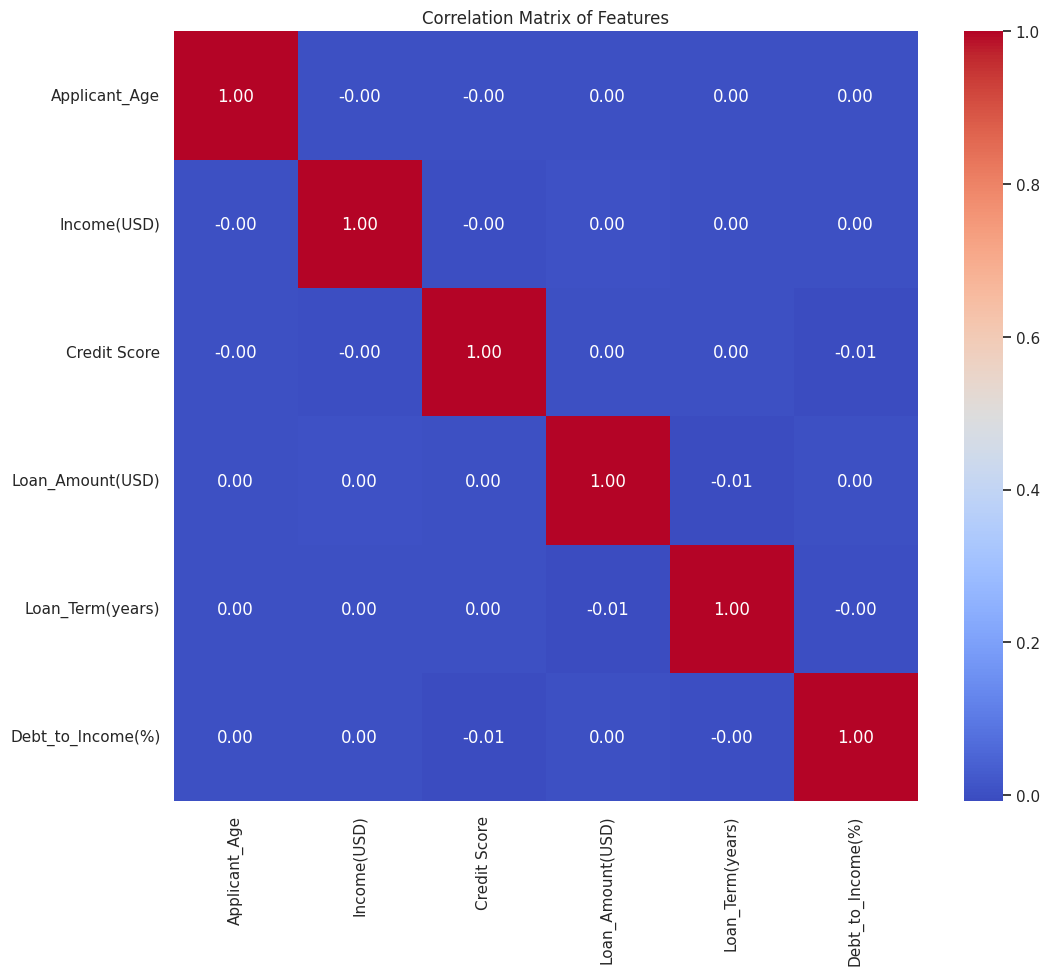

In [ ]:
# Calculate the correlation matrix using your 'data' DataFrame
correlation_matrix = data[numerical_features].corr()

# Display the correlation matrix (optional for understanding)
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
correlation_threshold = 0.8

# Find highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Remove highly correlated features from your dataset
data_reduced = data.drop(columns=highly_correlated_features)

# Display the remaining features
print("Remaining Features after Correlation-based Reduction:", data_reduced.columns)

Remaining Features after Correlation-based Reduction: Index(['Applicant_Age', 'Gender', 'Marital_Status', 'Income(USD)',
       'Credit Score', 'Loan_Amount(USD)', 'Loan_Purpose', 'Residence_State',
       'Loan_Term(years)', 'Debt_to_Income(%)', 'Employment_status',
       'Loan_Status(Target)'],
      dtype='object')


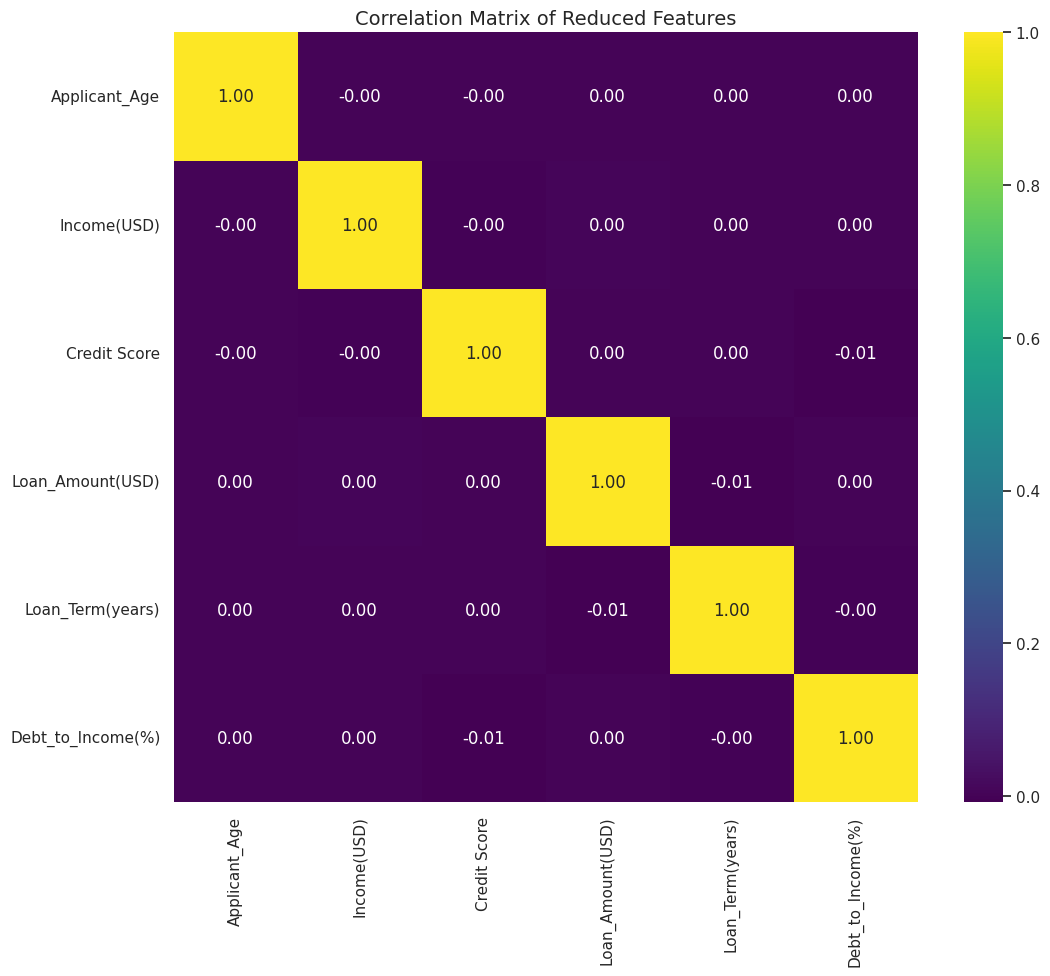

In [ ]:
# Calculate the correlation matrix for the reduced features
reduced_correlation_matrix = data_reduced[numerical_features].corr()

# Visualize the reduced correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(reduced_correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix of Reduced Features", fontsize=14)
plt.show()

In [ ]:
print("Shape of data before reduction:", data.shape)
print("Shape of data after reduction:", data_reduced.shape)

Shape of data before reduction: (101417, 12)
Shape of data after reduction: (101417, 12)


In [ ]:
# Split data_reduced into training and testing sets if you haven't already
from sklearn.model_selection import train_test_split
# Assuming 'Loan_Status(Target)' is your target variable
X = data_reduced.drop('Loan_Status(Target)', axis=1)
y = data_reduced['Loan_Status(Target)']
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes and samples
print("Training Data Shape:", X_train_reduced.shape)
print("Testing Data Shape:", X_test_reduced.shape)
print("\nSample of Preprocessed Training Data:\n", X_train_reduced.head())
print("\nSample of Preprocessed Testing Data:\n", X_test_reduced.head())

Training Data Shape: (81133, 11)
Testing Data Shape: (20284, 11)

Sample of Preprocessed Training Data:
        Applicant_Age  Gender Marital_Status  Income(USD)  Credit Score  \
31504           32.0    Male         single      49214.0         818.0   
69594           30.0    Male         single     102350.0         665.0   
56484           58.0  Female         single     138857.0         826.0   
63795           37.0  Female        married      48974.0         437.0   
65100           53.0  Female        married      59837.0         508.0   

       Loan_Amount(USD) Loan_Purpose Residence_State  Loan_Term(years)  \
31504            3623.0     Personal       Telangana              13.0   
69594           42088.0    Education       Karnataka               4.0   
56484          311773.0         Auto  Madhya_Pradesh               9.0   
63795          114344.0         Auto     West_Bengal              19.0   
65100          178726.0         Auto           Bihar               3.0   

     

In [ ]:
print("Missing values in X_train_reduced:\n", X_train_reduced.isnull().sum())
print("\nMissing values in X_test_reduced:\n", X_test_reduced.isnull().sum())

Missing values in X_train_reduced:
 Applicant_Age        0
Gender               0
Marital_Status       0
Income(USD)          0
Credit Score         0
Loan_Amount(USD)     0
Loan_Purpose         0
Residence_State      0
Loan_Term(years)     0
Debt_to_Income(%)    0
Employment_status    0
dtype: int64

Missing values in X_test_reduced:
 Applicant_Age        0
Gender               0
Marital_Status       0
Income(USD)          0
Credit Score         0
Loan_Amount(USD)     0
Loan_Purpose         0
Residence_State      0
Loan_Term(years)     0
Debt_to_Income(%)    0
Employment_status    0
dtype: int64


In [ ]:
# Model Building and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import RandomizedSearchCV
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
from google.colab import files
uploaded = files.upload()


Saving credit_underwriting_data.csv to credit_underwriting_data (1).csv


In [71]:
data.fillna({
    'Gender': data['Gender'].mode()[0],  # Use mode for categorical
    'Marital_Status': data['Marital_Status'].mode()[0],  # Use mode for categorical
    'Income(USD)': data['Income(USD)'].mean(),  # Use mean for numerical
    'Credit Score': data['Credit Score'].mean(),  # Use mean for numerical
    'Loan_Amount(USD)': data['Loan_Amount(USD)'].mean(),  # Use mean for numerical
    'Loan_Purpose': data['Loan_Purpose'].mode()[0],  # Use mode for categorical
    'Residence_State': data['Residence_State'].mode()[0],  # Use mode for categorical
    'Loan_Term(years)': data['Loan_Term(years)'].mode()[0],  # Use mode for numerical (likely discrete)
    'Debt_to_Income(%)': data['Debt_to_Income(%)'].mean(),  # Use mean for numerical
}, inplace=True)

<Figure size 1000x600 with 0 Axes>

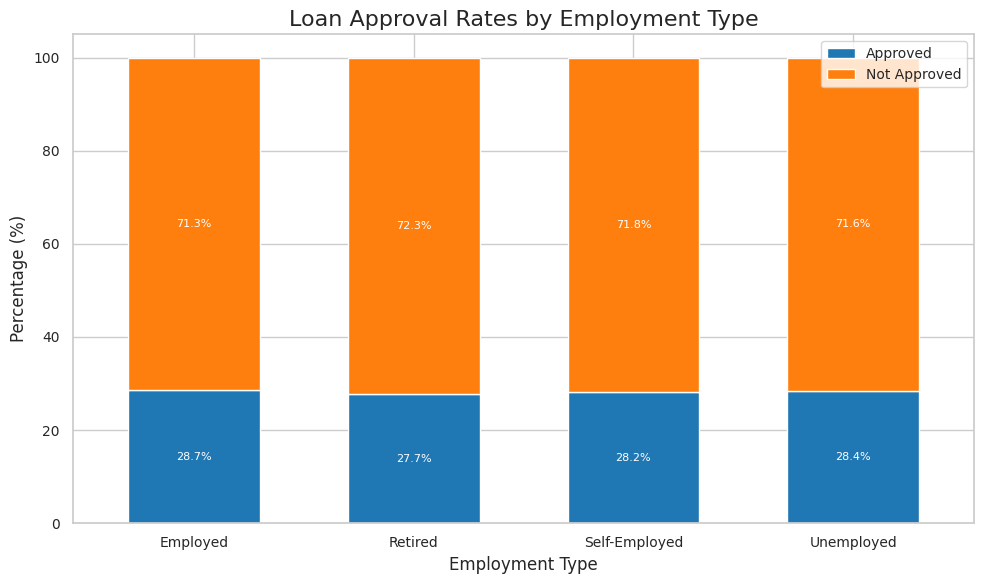

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Adjust figure size for better readability

# Calculate approval rates by employment type
emp_approval = data.groupby('Employment_status')['Loan_Status(Target)'].value_counts(normalize=True).unstack() * 100
ax = emp_approval[['Approved', 'Denied']].plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'],
                                    figsize=(10, 6), width=0.6)  # Adjust bar width

# Enhancements
plt.title('Loan Approval Rates by Employment Type', fontsize=16)  # Update title
plt.ylabel('Percentage (%)', fontsize=12)  # Add units to y-axis label
plt.xlabel('Employment Type', fontsize=12)  # Update x-axis label
plt.xticks(rotation=0, ha='center', fontsize=10)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10)  # Adjust y-axis tick font size
plt.legend(['Approved', 'Not Approved'], loc='upper right', fontsize=10)  # Adjust legend position and font size

# Add data labels (percentages) to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, '{:.1f}%'.format(height), ha='center', va='center', fontsize=8, color='white')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

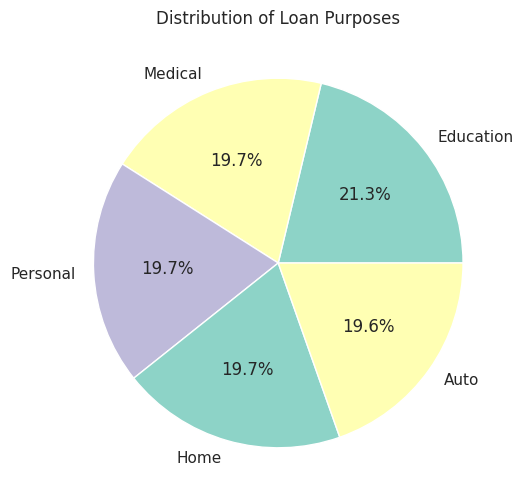

In [78]:
plt.figure(figsize=(6, 6))
loan_purpose_distribution = data['Loan_Purpose'].value_counts()
loan_purpose_distribution.plot.pie(autopct='%1.1f%%', colors=['#8dd3c7', '#ffffb3', '#bebada'])
plt.title('Distribution of Loan Purposes')
plt.ylabel('')
plt.show()

In [79]:
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
       Applicant_Age    Income(USD)   Credit Score  Loan_Amount(USD)  \
count  101417.000000  101417.000000  101417.000000      101417.00000   
mean       49.995400   89816.977300     575.286213      249589.47903   
std        16.936477   34341.442622     158.116478      142788.90406   
min        21.000000   30001.000000     300.000000        1000.00000   
25%        35.000000   60339.000000     439.000000      127528.00000   
50%        50.000000   89816.977300     575.286213      249589.47903   
75%        65.000000  119328.000000     711.000000      372382.00000   
max        79.000000  150000.000000     850.000000      499998.00000   

       Loan_Term(years)  Debt_to_Income(%)  
count     101417.000000      101417.000000  
mean          15.484630          24.989140  
std            8.603178          14.597397  
min            1.000000           0.000000  
25%            8.000000          12.000000  
50%           15.484630          25.000000  
75%           23

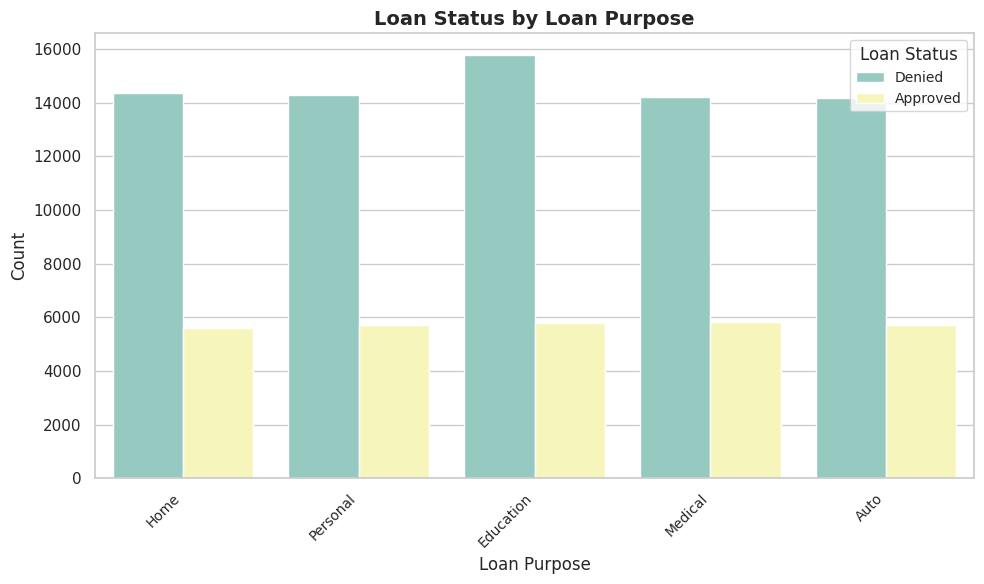

In [80]:
plt.figure(figsize=(10, 6))

# Replace 'Loan_Purpose' with the desired categorical feature
sns.countplot(x='Loan_Purpose', hue='Loan_Status(Target)', data=data, palette='Set3')

plt.title('Loan Status by Loan Purpose', fontsize=14, fontweight='bold')  # Enhanced title
plt.xlabel('Loan Purpose', fontsize=12)  # Enhanced x-axis label
plt.ylabel('Count', fontsize=12)  # Enhanced y-axis label
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.legend(title='Loan Status', fontsize=10)  # Enhanced legend

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib
import os


In [82]:
from google.colab import files
uploaded = files.upload()

Saving credit_underwriting_data.csv to credit_underwriting_data (2).csv


In [83]:
#load the dataset
data = pd.read_csv('credit_underwriting_data.csv')

In [85]:
# Drop rows with missing Loan_Status(Target)
data = data.dropna(subset=['Loan_Status(Target)'])

In [86]:
import pandas as pd
# ... (other imports)

# ... (load your dataset into the 'data' DataFrame)

# Handle missing numerical values using median imputation
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_imputer = SimpleImputer(strategy='median')
data[numerical_features] = num_imputer.fit_transform(data[numerical_features])

# ... (rest of your code)

In [87]:
from sklearn.impute import SimpleImputer

# Handle missing categorical values using mode imputation
categorical_features = data.select_dtypes(include=['object']).columns.tolist()  # Get categorical features

# Create a SimpleImputer instance with the 'most_frequent' strategy (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer to your categorical features and transform them
data[categorical_features] = cat_imputer.fit_transform(data[categorical_features])

In [91]:
from sklearn.preprocessing import LabelEncoder

# Create a dictionary to store LabelEncoders for each categorical feature
label_encoders = {}

# Get a list of all categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Add any additional categorical features that need encoding
# (replace with actual column names if they are different)
categorical_features += ['Employment_status','Loan_Status(Target)', 'Residence_State', 'Loan_Purpose', 'Employment_status', 'Marital_Status', 'Gender']

# Loop through categorical features and apply Label Encoding
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Encode and update the column in the DataFrame
    label_encoders[col] = le  # Store the encoder for later use

# Split data into features (X) and target (y)
X = data.drop(columns=['Loan_Status(Target)'])  # Replace with actual target column name
y = data['Loan_Status(Target)']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 100.00%
Confusion Matrix:
[[ 5795     0]
 [    0 14489]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5795
           1       1.00      1.00      1.00     14489

    accuracy                           1.00     20284
   macro avg       1.00      1.00      1.00     20284
weighted avg       1.00      1.00      1.00     20284



In [99]:
joblib.dump(model, 'loan_prediction_model.pkl')


# Modified predict_loan_status function
def predict_loan_status(input_data):
    input_df = pd.DataFrame([input_data], columns=X.columns)  # Use X.columns

    # Handle new categorical values (using the stored label encoders)
    for col in categorical_features:
        if col in X.columns and col in label_encoders:  # Check if column is in X and has a label encoder
            if input_df[col].dtype == object:  # If the feature is categorical in input_data
                try:
                    input_df[col] = label_encoders[col].transform(input_df[col])  # Transform if possible
                except ValueError:
                    # Handle unknown values (e.g., assign -1 or a separate category)
                    input_df[col] = -1
            # If the feature was numeric in the training data, but categorical in input_data:
            # Option 1: Convert it back to numeric using pd.to_numeric or a custom function
            # Option 2: Ignore it (might lose some information)
            # Option 3: Handle it as a missing value

    prediction = model.predict(input_df)
    return "Approved" if prediction[0] == 1 else "Rejected"





In [101]:
new_data = {
    'Gender': 'Male',
    'Marital_Status': 'Yes',
    'Employment_status': 'Salaried',
    'Income(USD)': 5000,
    'Loan_Amount(USD)': 150,
    'Debt_t0_income(%)': 11,
    'Loan_Term(years)': 30,
    'Credit Score': 750,
    'Residence_State': 'CA',
    'Loan_Purpose': 'Home'
}

# ... (Your predict_loan_status function from previous responses)

print(f"Loan Prediction: {predict_loan_status(new_data)}")

Loan Prediction: Rejected
